In [1]:
import seaborn as sns 
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
model_metrics = pd.read_csv('./results/models_metrics.csv')

In [3]:
r_order = model_metrics.groupby(['category']).agg({'p': 'mean', 'f': 'mean', 'r': 'mean'}).sort_values(by='r', ascending=False).index
p_order = model_metrics.groupby(['category']).agg({'p': 'mean', 'f': 'mean', 'p': 'mean'}).sort_values(by='p', ascending=False).index
f_order = model_metrics.groupby(['category']).agg({'p': 'mean', 'f': 'mean', 'f': 'mean'}).sort_values(by='f', ascending=False).index

/tmp/ipykernel_2593764/588325815.py:13: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=30, ha='right')
/tmp/ipykernel_2593764/588325815.py:13: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=30, ha='right')
/tmp/ipykernel_2593764/588325815.py:13: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=30, ha='right')


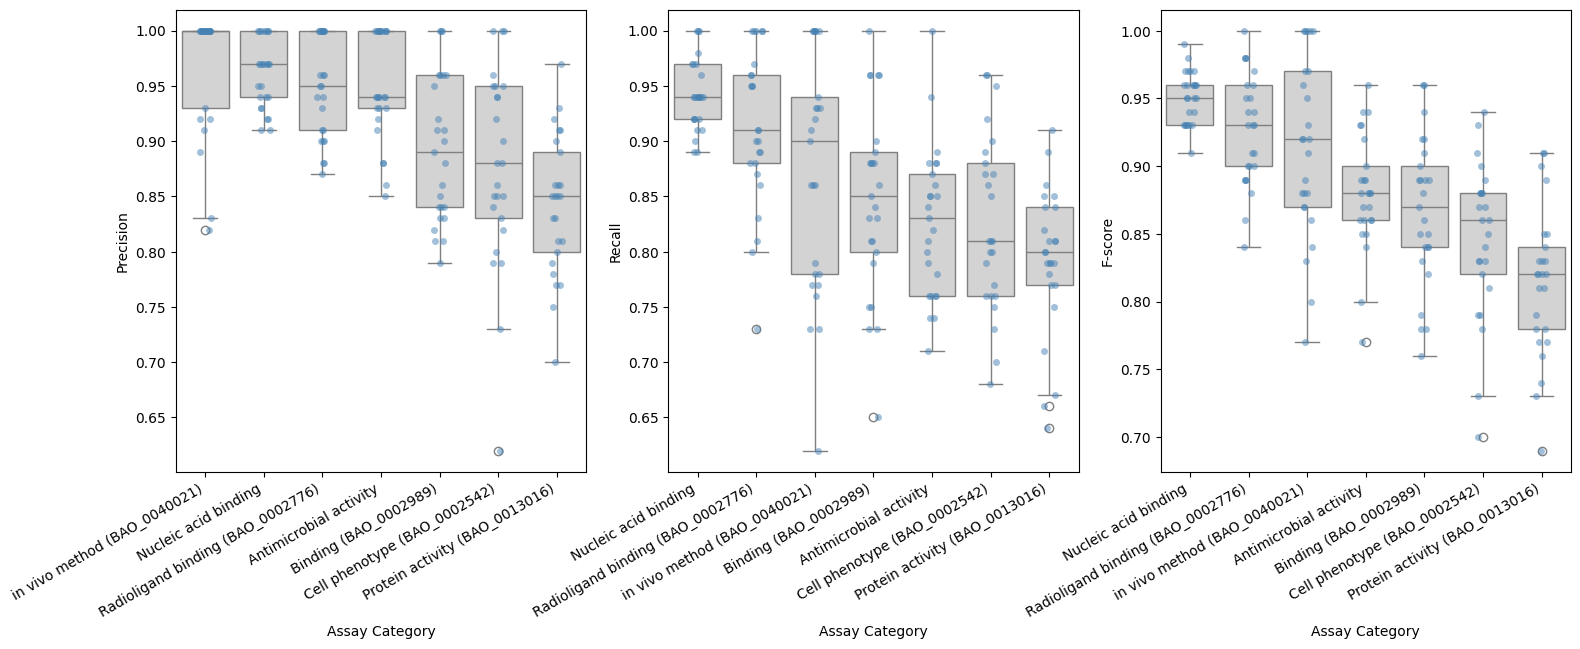

In [4]:
fig, axs = plt.subplots(ncols=3, figsize=(18, 6), dpi=100)
sns.boxplot(x='category', y='p', data=model_metrics, ax=axs[0], order=p_order, color='lightgrey')
sns.boxplot(x='category', y='r', data=model_metrics, ax=axs[1], order=r_order, color='lightgrey')
sns.boxplot(x='category',y='f', data=model_metrics, ax=axs[2], order=f_order, color='lightgrey')

sns.stripplot(x='category', y='p', data=model_metrics, ax=axs[0], color="steelblue", size=5, alpha=0.5) 
sns.stripplot(x='category', y='r', data=model_metrics, ax=axs[1], color="steelblue", size=5, alpha=0.5) 
sns.stripplot(x='category', y='f', data=model_metrics, ax=axs[2], color="steelblue", size=5, alpha=0.5) 


for ax, parameter in zip(axs, ['Precision', 'Recall', 'F-score']):
    ax.set(ylabel=parameter, xlabel='Assay Category')
    ax.set_xticklabels(ax.get_xticklabels(), rotation=30, ha='right')

fig.savefig("results/cv_broad_category.png", bbox_inches = "tight")

#### Make table of average P, R and F-scores

In [5]:
averages = model_metrics.groupby(['category']).agg({'p': 'mean', 'r': 'mean', 'f': 'mean'}).sort_values(by='p', ascending=False)
averages = averages.map(lambda x: format(x, ".2f"))
averages

,p,r,f
category,,,
in vivo method (BAO_0040021),0.97,0.87,0.91
Nucleic acid binding,0.96,0.94,0.95
Radioligand binding (BAO_0002776),0.95,0.91,0.93
Antimicrobial activity,0.95,0.83,0.88
Binding (BAO_0002989),0.89,0.85,0.87
Cell phenotype (BAO_0002542),0.88,0.83,0.85
Protein activity (BAO_0013016),0.84,0.79,0.81


In [6]:
averages.to_csv('./results/average_performance.csv')